In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout,GRU
from keras import optimizers 

import yfinance as yf
seed = 1234
np.random.seed(seed)
plt.style.use('ggplot')

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Import Data

In [3]:
ticker = "eth-usd"
dataraw  = yf.download(ticker)
dataraw

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-11-09,308.644989,329.451996,307.056000,320.884003,320.884003,893249984
2017-11-10,320.670990,324.717987,294.541992,299.252991,299.252991,885985984
2017-11-11,298.585999,319.453003,298.191986,314.681000,314.681000,842300992
2017-11-12,314.690002,319.153015,298.513000,307.907990,307.907990,1613479936
2017-11-13,307.024994,328.415009,307.024994,316.716003,316.716003,1041889984
...,...,...,...,...,...,...
2023-04-28,1909.273071,1923.199219,1876.291870,1892.512817,1892.512817,7691759733
2023-04-29,1892.565063,1916.973755,1887.990479,1908.916992,1908.916992,4796651246
2023-04-30,1908.741333,1938.417969,1876.924316,1876.924316,1876.924316,6539641957


In [4]:
dataraw.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2001.000000,2001.000000,2001.000000,2001.000000,2001.000000,2.001000e+03
mean,1162.479098,1198.737559,1121.901658,1163.010872,1163.010872,1.263521e+10
std,1159.978361,1194.934085,1119.804624,1159.460606,1159.460606,1.052938e+10
min,84.279694,85.342743,82.829887,84.308296,84.308296,6.217330e+08
25%,218.554596,224.216873,211.117996,218.451996,218.451996,4.841630e+09
50%,603.902039,618.983154,580.628784,605.187012,605.187012,1.021629e+10
75%,1788.362183,1827.293091,1728.980957,1788.217041,1788.217041,1.762105e+10
max,4810.071289,4891.704590,4718.039062,4812.087402,4812.087402,8.448291e+10


# Feature Selection

 Count row of data:  2001


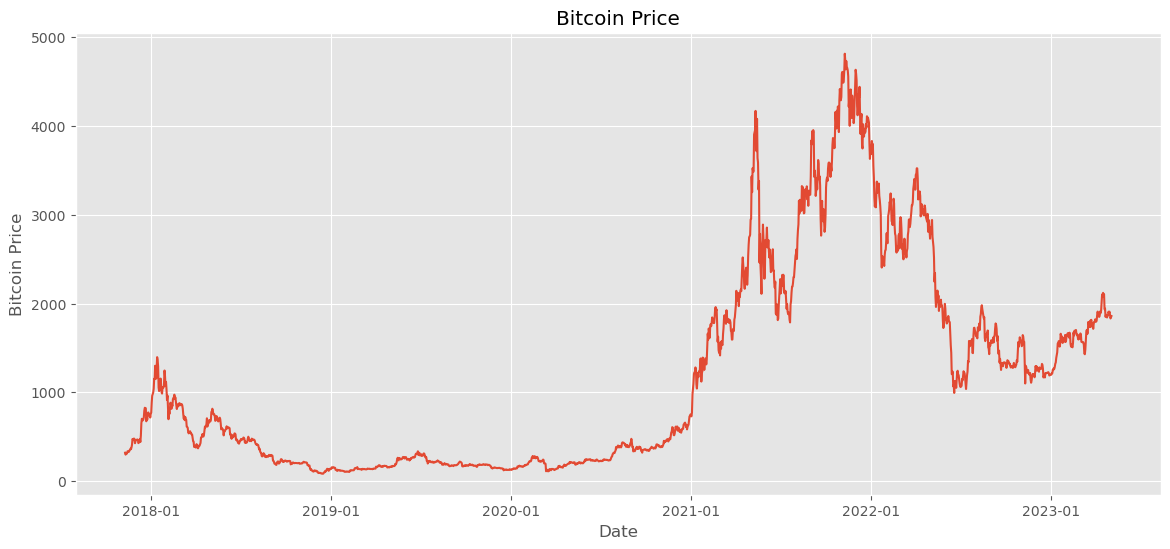

In [5]:
# use feature 'Date' & 'Close'
dataset = pd.DataFrame(dataraw['Close'])
print(' Count row of data: ',len(dataset))

fig = plt.figure(figsize=(14, 6))
plt.plot(dataset)
plt.xlabel('Date')
plt.ylabel('cryptocurrency Price')
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m"))
plt.title('cryptocurrency Price')
plt.show()

# Preprocessing Data

## Normalization Min-Max

In [6]:
#Min-Max Normalization
dataset_norm = dataset.copy()
dataset[['Close']]
scaler = MinMaxScaler()
dataset_norm['Close'] = scaler.fit_transform(dataset[['Close']])
dataset_norm

,Close
Date,
2017-11-09,0.050040
2017-11-10,0.045464
2017-11-11,0.048727
2017-11-12,0.047295
2017-11-13,0.049158
...,...
2023-04-28,0.382464
2023-04-29,0.385934
2023-04-30,0.379167


## Graph Data Normalized

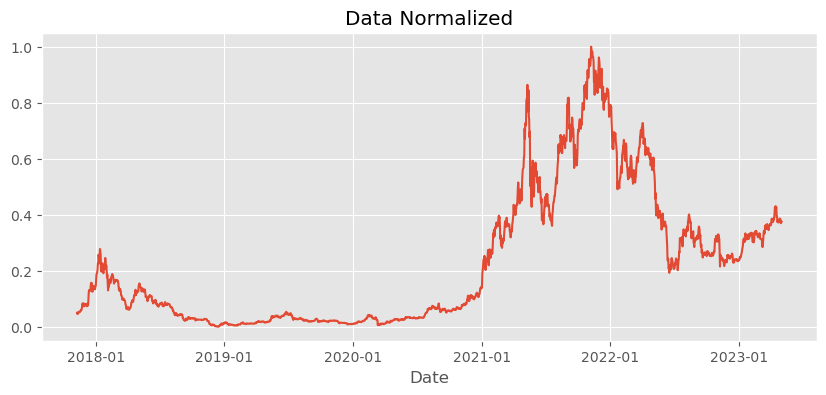

In [7]:
fig = plt.figure(figsize=(10, 4))
plt.plot(dataset_norm)
plt.xlabel('Date')
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m"))
plt.title('Data Normalized')
plt.show()

## Data Partition

In [8]:
# Partition data into data train, val & test
totaldata = dataset.values
totaldatatrain = int(len(totaldata)*0.7)
totaldataval = int(len(totaldata)*0.1)
totaldatatest = int(len(totaldata)*0.2)

# Store data into each partition
training_set = dataset_norm[0:totaldatatrain]
val_set=dataset_norm[totaldatatrain:totaldatatrain+totaldataval]
test_set = dataset_norm[totaldatatrain+totaldataval:]

### Training Data Graph

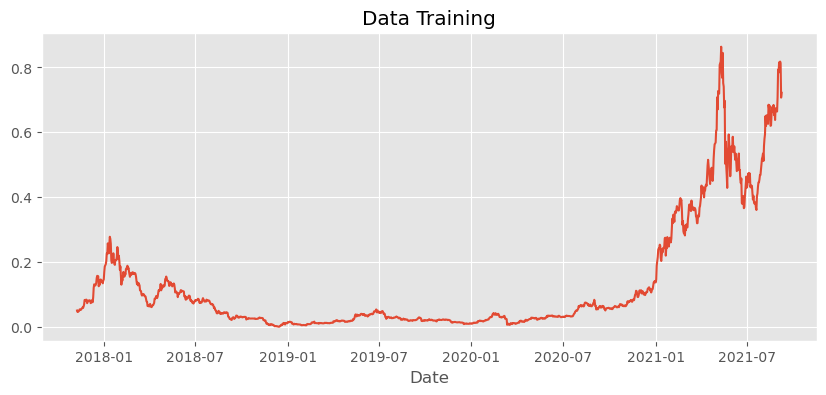

In [9]:
# graph of data training
fig = plt.figure(figsize=(10, 4))
plt.plot(training_set)
plt.xlabel('Date')
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m"))
plt.title('Data Training')
plt.show()

### Data Validation Graph

,Close
Date,
2021-09-09,0.707104
2021-09-10,0.661452
2021-09-11,0.673883
2021-09-12,0.703465
2021-09-13,0.677105
...,...
2022-03-23,0.623286
2022-03-24,0.639572
2022-03-25,0.639278


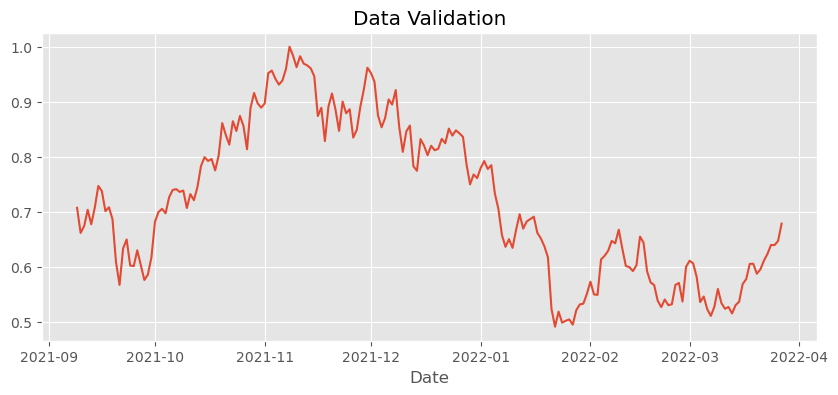

In [10]:
# graph of data validation
fig = plt.figure(figsize=(10, 4))
plt.plot(val_set)
plt.xlabel('Date')
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m"))
plt.title('Data Validation')
val_set

### Data Test Graph

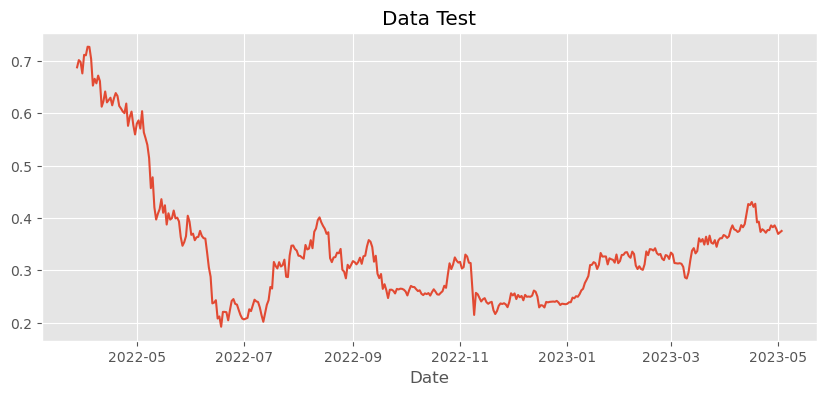

,Close
Date,
2022-03-28,0.687918
2022-03-29,0.701742
2022-03-30,0.698182
2022-03-31,0.676287
2022-04-01,0.711802
...,...
2023-04-28,0.382464
2023-04-29,0.385934
2023-04-30,0.379167


In [11]:
# graph of data test
fig = plt.figure(figsize=(10, 4))
plt.plot(test_set)
plt.xlabel('Date')
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m"))
plt.title('Data Test')
plt.show()
test_set

## Sliding Windows

In [12]:
# Initiaton value of lag
lag = 2
# sliding windows function
def create_sliding_windows(data,len_data,lag):
    x=[]
    y=[]
    for i in range(lag,len_data):
        x.append(data[i-lag:i,0])
        y.append(data[i,0]) 
    return np.array(x),np.array(y)

# Formating data into array for create sliding windows
array_training_set = np.array(training_set)
array_val_set = np.array(val_set)
array_test_set = np.array(test_set)

# Create sliding windows into training data
x_train, y_train = create_sliding_windows(array_training_set,len(array_training_set), lag)
x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))
# Create sliding windows into validation data
x_val,y_val = create_sliding_windows(array_val_set,len(array_val_set),lag)
x_val = np.reshape(x_val, (x_val.shape[0],x_val.shape[1],1))
# Create sliding windows into test data
x_test,y_test = create_sliding_windows(array_test_set,len(array_test_set),lag)
x_test = np.reshape(x_test, (x_test.shape[0],x_test.shape[1],1))

# Model GRU

In [13]:
# Hyperparameters
learning_rate = 0.0001
hidden_unit = 64
batch_size=256
epoch = 100

# Architecture Gated Recurrent Unit
regressorGRU = Sequential()

# First GRU layer with dropout
regressorGRU.add(GRU(units=hidden_unit, return_sequences=True, input_shape=(x_train.shape[1],1), activation = 'tanh'))
regressorGRU.add(Dropout(0.2))
# Second GRU layer with dropout
regressorGRU.add(GRU(units=hidden_unit, return_sequences=True, activation = 'tanh'))
regressorGRU.add(Dropout(0.2))
# Third GRU layer with dropout
regressorGRU.add(GRU(units=hidden_unit, return_sequences=False, activation = 'tanh'))
regressorGRU.add(Dropout(0.2))

# Output layer
regressorGRU.add(Dense(units=1))

# Compiling the Gated Recurrent Unit
regressorGRU.compile(optimizer=optimizers.Adam(learning_rate),loss='mean_squared_error')

# Fitting ke data training dan data validation
pred = regressorGRU.fit(x_train, y_train, validation_data=(x_val,y_val), batch_size=batch_size, epochs=epoch)

Epoch 1/100
6/6 [==============================] - 6s 199ms/step - loss: 0.0443 - val_loss: 0.4977
Epoch 2/100
6/6 [==============================] - 0s 14ms/step - loss: 0.0405 - val_loss: 0.4655
Epoch 3/100
6/6 [==============================] - 0s 14ms/step - loss: 0.0367 - val_loss: 0.4338
Epoch 4/100
6/6 [==============================] - 0s 13ms/step - loss: 0.0333 - val_loss: 0.4028
Epoch 5/100
6/6 [==============================] - 0s 13ms/step - loss: 0.0304 - val_loss: 0.3725
Epoch 6/100
6/6 [==============================] - 0s 12ms/step - loss: 0.0282 - val_loss: 0.3434
Epoch 7/100
6/6 [==============================] - 0s 14ms/step - loss: 0.0258 - val_loss: 0.3158
Epoch 8/100
6/6 [==============================] - 0s 14ms/step - loss: 0.0242 - val_loss: 0.2899
Epoch 9/100
6/6 [==============================] - 0s 17ms/step - loss: 0.0226 - val_loss: 0.2662
Epoch 10/100
6/6 [==============================] - 0s 17ms/step - loss: 0.0216 - val_loss: 0.2447
Epoch 11/100
6/6 [

Epoch 82/100
6/6 [==============================] - 0s 18ms/step - loss: 8.5790e-04 - val_loss: 0.0014
Epoch 83/100
6/6 [==============================] - 0s 13ms/step - loss: 7.6648e-04 - val_loss: 0.0014
Epoch 84/100
6/6 [==============================] - 0s 16ms/step - loss: 8.0358e-04 - val_loss: 0.0014
Epoch 85/100
6/6 [==============================] - 0s 14ms/step - loss: 8.1585e-04 - val_loss: 0.0014
Epoch 86/100
6/6 [==============================] - 0s 15ms/step - loss: 7.5867e-04 - val_loss: 0.0014
Epoch 87/100
6/6 [==============================] - 0s 15ms/step - loss: 8.2956e-04 - val_loss: 0.0014
Epoch 88/100
6/6 [==============================] - 0s 13ms/step - loss: 8.4092e-04 - val_loss: 0.0014
Epoch 89/100
6/6 [==============================] - 0s 13ms/step - loss: 7.5438e-04 - val_loss: 0.0014
Epoch 90/100
6/6 [==============================] - 0s 14ms/step - loss: 8.5495e-04 - val_loss: 0.0015
Epoch 91/100
6/6 [==============================] - 0s 14ms/step - loss: 

## Graph Training loss & Validation Loss

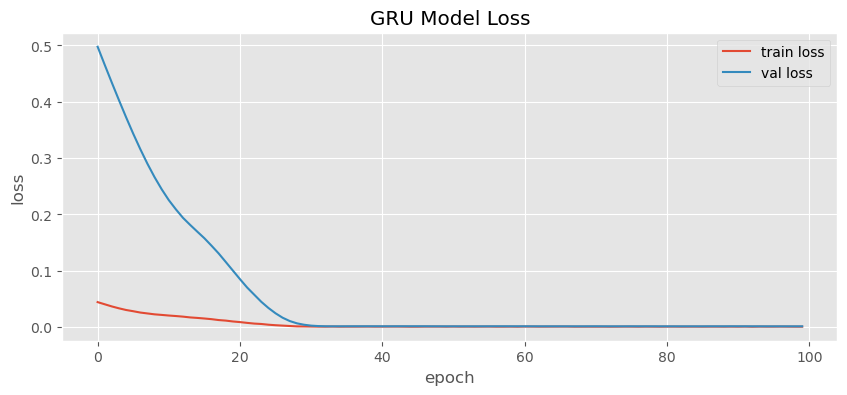

In [14]:
# Graph model loss (train loss & val loss)
fig = plt.figure(figsize=(10, 4))
plt.plot(pred.history['loss'], label='train loss')
plt.plot(pred.history['val_loss'], label='val loss')
plt.title('GRU Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(loc='upper right')
plt.show()

## Training Loss & Validation Loss Table

In [15]:
# Tabel value of training loss & validation loss
learningrate_parameter = learning_rate
train_loss=pred.history['loss'][-1]
validation_loss=pred.history['val_loss'][-1]
learningrate_parameter=pd.DataFrame(data=[[learningrate_parameter, train_loss, validation_loss]],
                                    columns=['Learning Rate', 'Training Loss', 'Validation Loss'])
learningrate_parameter.set_index('Learning Rate')

,Training Loss,Validation Loss
Learning Rate,,
0.0001,0.000754,0.001372


## Comparison Data Test with Prediction Results

In [16]:
# Calculatre value of Root Mean Square Error 
y_pred = regressorGRU.predict(x_test)
# Rescale the predicted and actual values
y_pred = scaler.inverse_transform(y_pred)
y_test = scaler.inverse_transform(y_test.reshape(-1, 1))
# Calculate the RMSE
mse = np.mean((y_test - y_pred)**2)
rmse = np.sqrt(mse)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)

# Calculate the MAPE
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
print("Mean Absolute Percentage Error:", mape)# Comparison data test with data prediction
datacompare = pd.DataFrame()
datatest=np.array(dataset['Close'][totaldatatrain+totaldataval+lag:])
datapred= y_pred

datacompare['Data Test'] = datatest
datacompare['Prediction Results'] = datapred
datacompare

13/13 [==============================] - 1s 2ms/step
Mean Squared Error: 7263.314516774702
Root Mean Squared Error: 85.22508150054597
Mean Absolute Percentage Error: 3.8981175167238256


,Data Test,Prediction Results
0,3385.157959,3331.601562
1,3281.642822,3371.676758
2,3449.552246,3326.922363
3,3445.059326,3308.541016
4,3522.833496,3423.895752
...,...,...
394,1892.512817,1846.025757
395,1908.916992,1869.756104
396,1876.924316,1863.770020
397,1831.954834,1864.981323


## Prediction Results Evaluation

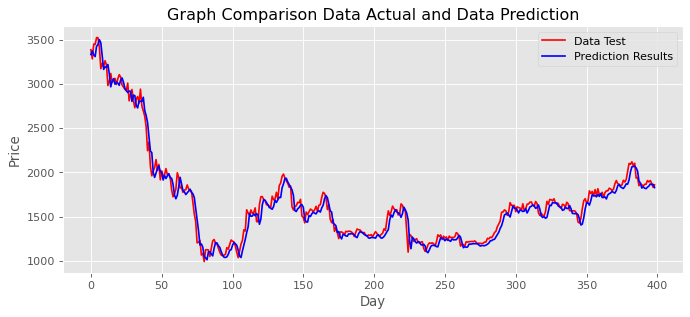

In [17]:
# Create graph data test and prediction result
plt.figure(num=None, figsize=(10, 4), dpi=80,facecolor='w', edgecolor='k')
plt.title('Graph Comparison Data Actual and Data Prediction')
plt.plot(datacompare['Data Test'], color='red',label='Data Test')
plt.plot(datacompare['Prediction Results'], color='blue',label='Prediction Results')
plt.xlabel('Day')
plt.ylabel('Price')
plt.legend()
plt.show()
